In [33]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("titanic.csv")
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df = data[['Sex','Age','SibSp','Parch','Survived','Embarked']].dropna()
x = df[['Sex','Age','SibSp','Parch','Embarked']]
y = df['Survived']

encoder = LabelEncoder()

sex_encoded = encoder.fit_transform(x[['Sex']])
embarked_encoded = encoder.fit_transform(x[['Embarked']])

c:\Users\admin\anaconda3\envs\torchgpu\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\anaconda3\envs\torchgpu\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
x['Sex'] = sex_encoded
x['Embarked'] = embarked_encoded

C:\Users\admin\AppData\Local\Temp\ipykernel_21576\2538276211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = sex_encoded
C:\Users\admin\AppData\Local\Temp\ipykernel_21576\2538276211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Embarked'] = embarked_encoded


In [24]:
x

,Sex,Age,SibSp,Parch,Embarked
0,1,22.0,1,0,2
1,0,38.0,1,0,0
2,0,26.0,0,0,2
3,0,35.0,1,0,2
4,1,35.0,0,0,2
...,...,...,...,...,...
885,0,39.0,0,5,1
886,1,27.0,0,0,2
887,0,19.0,0,0,2
889,1,26.0,0,0,0


In [25]:
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.2, stratify=y)

train_input.shape

(569, 5)

In [26]:
reg = KNeighborsClassifier(n_neighbors=3)
reg.fit(train_input, train_target)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
print("Train Score:", reg.score(train_input, train_target))
print("Test Score:", reg.score(test_input, test_target))

Train Score: 0.8506151142355008
Test Score: 0.6293706293706294


In [28]:
reg = DecisionTreeClassifier()
reg.fit(train_input, train_target)

print("Train Score:", reg.score(train_input, train_target))
print("Test Score:", reg.score(test_input, test_target))

Train Score: 0.9314586994727593
Test Score: 0.7132867132867133


In [29]:
reg = LogisticRegression()
reg.fit(train_input, train_target)

print("Train Score:", reg.score(train_input, train_target))
print("Test Score:", reg.score(test_input, test_target))

Train Score: 0.7926186291739895
Test Score: 0.7482517482517482


In [47]:
model = keras.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # 이진 출력

])
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = keras.callbacks.EarlyStopping(monitor='loss',restore_best_weights=True,patience=3)
history = model.fit(
    train_input,
    train_target,
    validation_data=(test_input, test_target),
    epochs= 1000,
    callbacks=[early_stop]
)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4042 - loss: 6.3580 - val_accuracy: 0.4056 - val_loss: 4.6052
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4025 - loss: 3.3242 - val_accuracy: 0.3706 - val_loss: 1.6103
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4903 - loss: 0.9098 - val_accuracy: 0.5944 - val_loss: 0.7128
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6011 - loss: 0.6847 - val_accuracy: 0.5944 - val_loss: 0.6463
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6380 - loss: 0.6343 - val_accuracy: 0.6434 - val_loss: 0.6338
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6204 - loss: 0.6236 - val_accuracy: 0.6084 - val_loss: 0.6303
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6327 - loss: 0.6133 - val_accuracy: 0.7203 - val_loss: 0.6197
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7030 - loss: 0.6016 - val_accuracy: 0

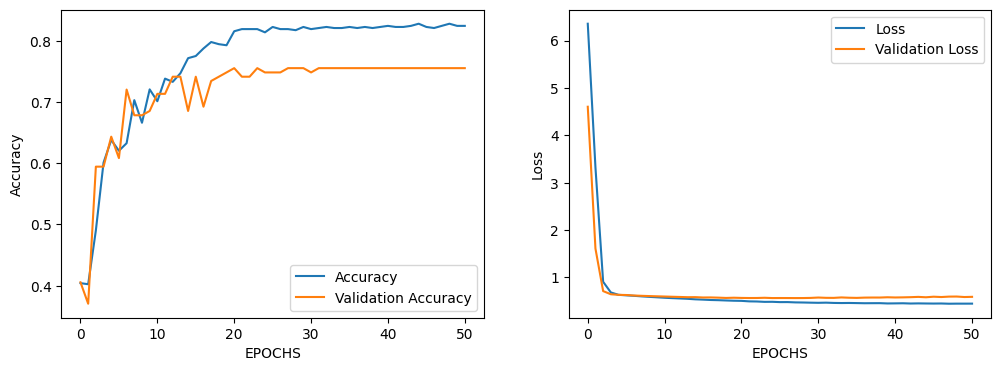

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])
plt.show()

In [10]:
model.evaluate(test_input, test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8252 - loss: 0.4768 


[0.4768041968345642, 0.8251748085021973]

In [39]:
GBM_model = LGBMClassifier()

GBM_model.fit(train_input, train_target)


[LightGBM] [Info] Number of positive: 230, number of negative: 339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404218 -> initscore=-0.387921
[LightGBM] [Info] Start training from score -0.387921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [45]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score, roc_auc_score

prediction= GBM_model.predict(test_input)
print("recall_score : " , recall_score(prediction, test_target))
print("roc_auc_score : " ,roc_auc_score(prediction, test_target))
print("precision_score : ", precision_score(prediction, test_target))
print("accuracy_score : ", accuracy_score(prediction, test_target))
print("f1_score : ", f1_score(prediction, test_target))

recall_score :  0.6935483870967742
roc_auc_score :  0.7541816009557947
precision_score :  0.7413793103448276
accuracy_score :  0.7622377622377622
f1_score :  0.7166666666666667
